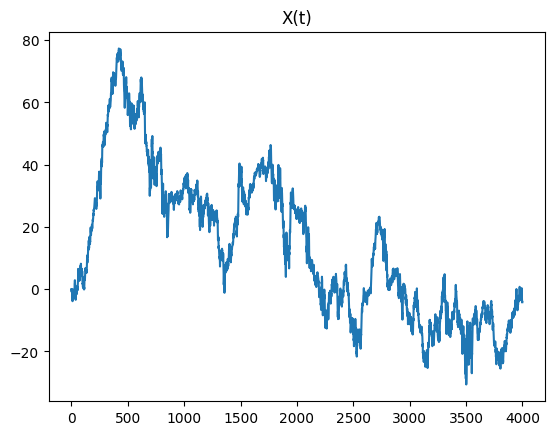

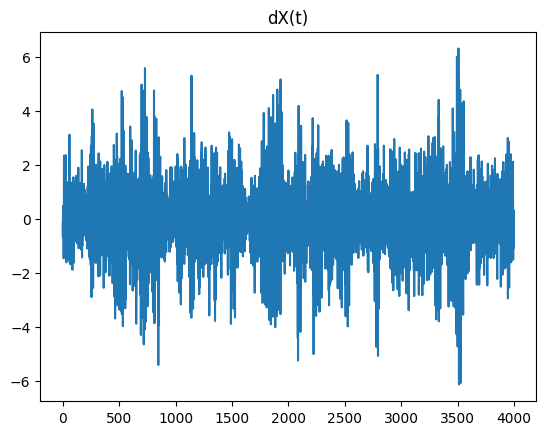

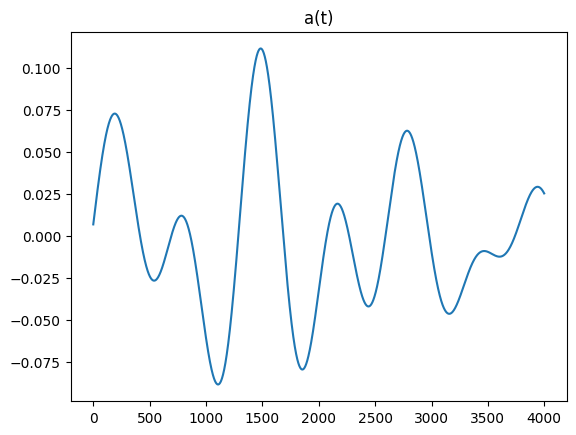

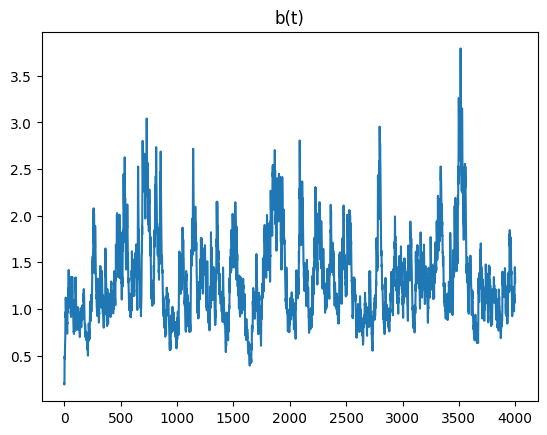

In [12]:
from sem.generate_series import create_sde_process
from sem.sem.normal_mixture_sem import NormalMixtureSEM
import matplotlib.pyplot as plt
import torch
import numpy as np
import random

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
random.seed(seed)



num_components = 5
length = 4000

series_dct = create_sde_process(length, n_components=num_components)
series = series_dct['X']
deltas = series[1:] - series[:-1]
a_trafaret = series_dct['a_t']
b_trafaret = series_dct['b_t']
plt.plot(series)
plt.title('X(t)')
plt.show()
plt.plot(deltas)
plt.title('dX(t)')
plt.show()
plt.plot(a_trafaret)
plt.title('a(t)')
plt.show()
plt.plot(b_trafaret)
plt.title('b(t)')
plt.show()

In [2]:
sem = NormalMixtureSEM(deltas, 'exp', 'EM', n_components=3, N_init=5, alpha=0.8, exp_smooth=0.6, prior_strength=0.0, tol=0.01, device="cuda")
p_k, a_k, b_k, percentiles_t, b_t, modes = sem.find_params()

N = 5; Max ACF(1): 0.9999999403953552
N = 10; Max ACF(1): 0.9675994515419006
N = 15; Max ACF(1): 0.9229303598403931
N = 20; Max ACF(1): 0.909864068031311
N = 25; Max ACF(1): 0.8780659437179565
N = 30; Max ACF(1): 0.8668965697288513
N = 35; Max ACF(1): 0.860132098197937
N = 40; Max ACF(1): 0.8530821800231934
N = 45; Max ACF(1): 0.847168505191803
N = 50; Max ACF(1): 0.8394033908843994
N = 55; Max ACF(1): 0.8399832844734192
N = 60; Max ACF(1): 0.8218846917152405
N = 65; Max ACF(1): 0.8199627995491028
N = 70; Max ACF(1): 0.8119117617607117
N = 75; Max ACF(1): 0.809200644493103
N = 80; Max ACF(1): 0.8117722868919373
N = 85; Max ACF(1): 0.8074469566345215
N = 90; Max ACF(1): 0.8019543886184692
N = 95; Max ACF(1): 0.7929076552391052
Found window length: 95
Finding parameters batch by batch (to fit into memory).
Batch 0
223.948974609375
227.37579345703125
230.52865600585938
232.90347290039062
234.53411865234375
235.79318237304688
236.7074737548828
237.36697387695312
237.83367919921875
238.1786

In [3]:
x_modal = torch.cumsum(modes, 0) + series[sem.series_length]
x_median = torch.cumsum(percentiles_t[:, 49], 0) + series[sem.series_length]
x_mean = torch.cumsum(torch.sum((sem.p * sem.a).cpu(), 1), 0) + series[sem.series_length]

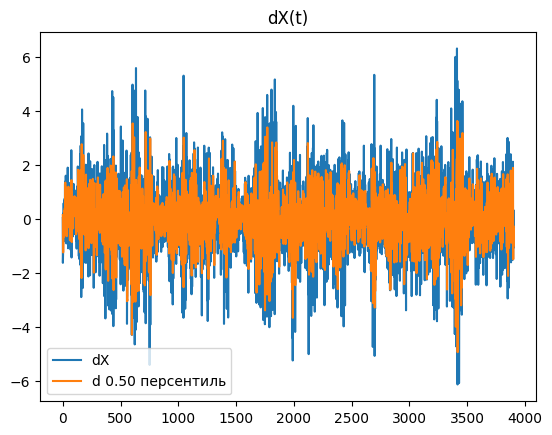

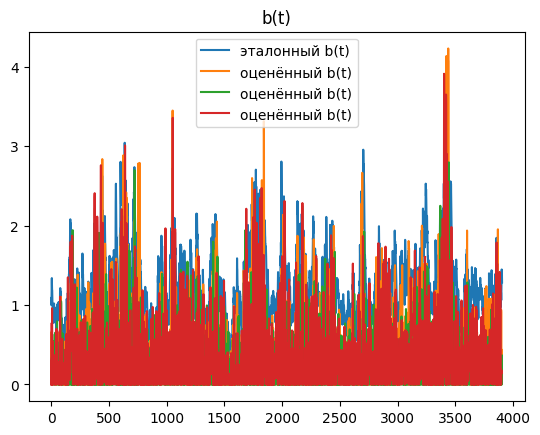

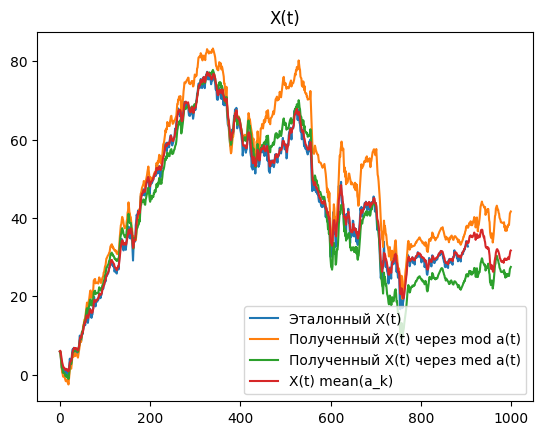

In [11]:
plt.plot(deltas[sem.series_length:], label='dX')
plt.plot(percentiles_t[:, 49], label="d 0.50 персентиль")
plt.legend()
plt.title("dX(t)")
plt.show()
plt.plot(b_trafaret[sem.series_length-1:], label="эталонный b(t)")
plt.plot(b_k, label="оценённый b(t)")
plt.legend()
plt.title("b(t)")
plt.show()
plt.plot(series[sem.series_length:1000], label="Эталонный X(t)")
plt.plot(x_modal[:1000], label="Полученный X(t) через mod a(t)")
plt.plot(x_median[:1000], label="Полученный X(t) через med a(t)")
plt.plot(x_mean[:1000], label='X(t) mean(a_k)')
plt.legend()
plt.title("X(t)")
plt.show()

In [5]:
sorter = torch.argsort(a_k, dim=-1)

idx = torch.meshgrid(
    *[torch.arange(dim) for dim in a_k.shape[:-1]],
    indexing='ij'
)
idx = list(idx)
idx.append(sorter)

a_k_sorted = a_k[idx[0].unsqueeze(-1), idx[1]]
b_k_sorted = b_k[idx[0].unsqueeze(-1), idx[1]]

print(b_k.shape)

torch.Size([3905, 3])


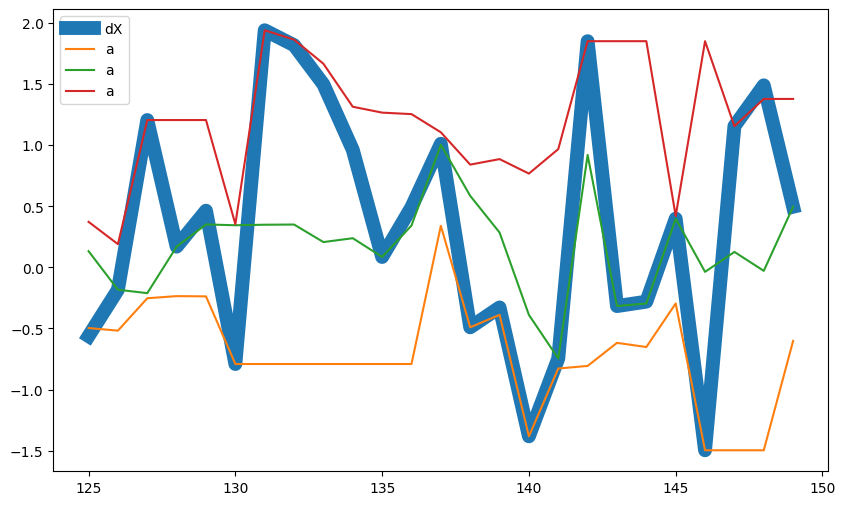

In [6]:
plt.figure(figsize=(10, 6))
i = 125
plt.plot(range(i, i+25), deltas[sem.series_length-1 + 125:sem.series_length-1 + 150], label='dX', linewidth=10)
plt.plot(range(i, i+25), a_k_sorted[125:150], label="a")
plt.legend()
plt.show()

In [7]:
a_k_sorted[125:150], torch.tensor(deltas[sem.series_length-1 + 125:sem.series_length-1 + 150]).unsqueeze(1), b_k_sorted[125:150]

(tensor([[-0.4967,  0.1324,  0.3726],
         [-0.5181, -0.1829,  0.1901],
         [-0.2528, -0.2113,  1.2061],
         [-0.2355,  0.1698,  1.2061],
         [-0.2375,  0.3514,  1.2061],
         [-0.7913,  0.3448,  0.3534],
         [-0.7913,  0.3491,  1.9411],
         [-0.7913,  0.3506,  1.8647],
         [-0.7913,  0.2070,  1.6669],
         [-0.7913,  0.2387,  1.3151],
         [-0.7913,  0.0851,  1.2669],
         [-0.7913,  0.3425,  1.2547],
         [ 0.3402,  1.0036,  1.1059],
         [-0.4907,  0.5856,  0.8412],
         [-0.3892,  0.2853,  0.8863],
         [-1.3832, -0.3892,  0.7677],
         [-0.8282, -0.7460,  0.9684],
         [-0.8070,  0.9205,  1.8518],
         [-0.6181, -0.3168,  1.8518],
         [-0.6522, -0.2958,  1.8518],
         [-0.2958,  0.3988,  0.4207],
         [-1.4976, -0.0368,  1.8518],
         [-1.4976,  0.1264,  1.1559],
         [-1.4976, -0.0283,  1.3788],
         [-0.6020,  0.4964,  1.3791]]),
 tensor([[-0.5626],
         [-0.1829],
        

In [9]:
%matplotlib inline
from IPython.display import clear_output
import matplotlib.pyplot as plt

for i in range(0, 100000 - 200, 4):
    clear_output(wait=True)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(i, i+200), deltas[sem.series_length-1 + i:sem.series_length-1 + i + 200], label='X')
    plt.plot(range(i, i+200), a_k_sorted[i:i+200], label="0.50 персентиль")
    plt.legend()
    plt.show()

KeyboardInterrupt: 